In [1]:
import ModelViz

/local1/data/scratch/pmlersem/rmi/mamba/envs/tslearn_env/lib/python3.11/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Create an instance of the ModelViz class, then use the functions to 
* `load_data / load_mfdata` to load data
* `load_grid` to load grid information
* `summarise_features` to sum sets of variables together
* `preprocess` to strip boundary and normalise 
* `make_tsds` to reshape data into a time series data set (tsds)
* `load_tsds` to load an existing time series data set from csv
* `train` to create a clustering model
* `load_model` to load an existing model
* `predict` to create predictions based on a tsds and model
* `get_cluster_info` to summarise predictions and calcuate mean/std dev for each cluster
* `plot_map` to plot the cluster output as a map
* `plot_ts` to plot time series for each cluster


## Train the model

Create an instace of ModelViz for the training data, read in that data and grid info

In [2]:
train = ModelViz.ModelViz()
train.load_mfdata('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/amm7_200[0-4]*.nc')
train.load_grid('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/domain_cfg.nc')

In [3]:
# Add physics fields from separate files
import xarray as xr
phys = ModelViz.ModelViz()
phys.load_mfdata('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/amm7_TS_200[0-4]*.nc')
phys.ds = phys.ds.rename_dims({'y_grid_T':'y','x_grid_T':'x'}).rename({'nav_lat_grid_T':'nav_lat','nav_lon_grid_T':'nav_lon'})
train.ds = xr.merge([train.ds,phys.ds[['votemper','vosaline']]])

Combine variables and preprocess - stripping the boundary layers and normalising

In [4]:
sum_vars={'Phytoplankton': ['P1_c', 'P2_c', 'P3_c', 'P4_c'],
            'Zooplankton': ['Z4_c', 'Z5_c', 'Z6_c'],
            'DOM': ['R1_c', 'R2_c', 'R3_c'],
            'POM': ['R4_c', 'R6_c', 'R8_c']}
train.summarise_features(sum_vars)
train.cluster_vars = ['votemper','vosaline','N1_p', 'N3_n', 'N4_n', 'N5_s', 'O2_o', 'B1_c','O3_c', 'O3_TA', 'Phytoplankton', 'Zooplankton', 'DOM', 'POM']
train.preprocess()

Make the dataset by reshaping the data into the form needed 

In [5]:
train.make_tsds()

Fit the model (can take some time) and save

In [7]:
train.train(n_clusters=5, file_path='model.ks', model_name='kshape')

Init 1


SystemError: <function _numba_unpickle at 0x7f6ff3cc2fc0> returned a result with an exception set

Produce a prediction of the training data

In [ ]:
train.predict()

Create cluster dataset with the classification map, plus mean and std dev time series for each cluster

In [ ]:
train.get_cluster_info(save=True, file_path='trained_clusters.nc')

Plot data

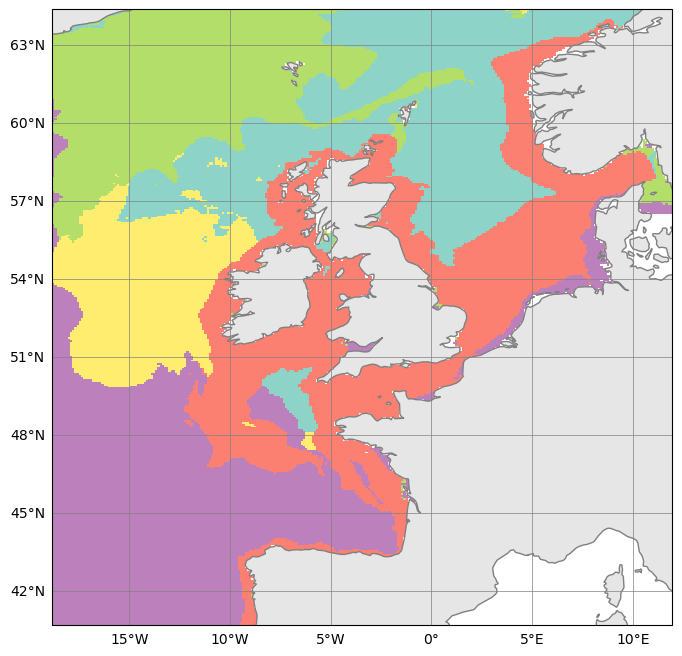

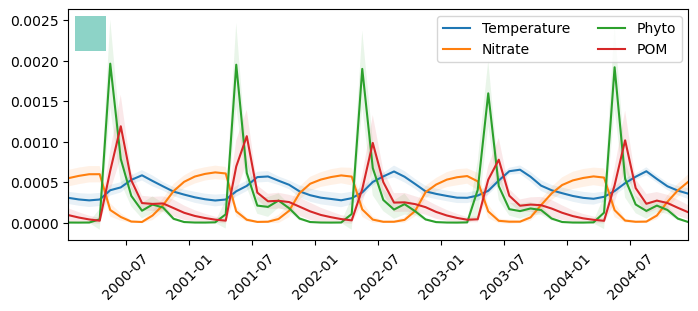

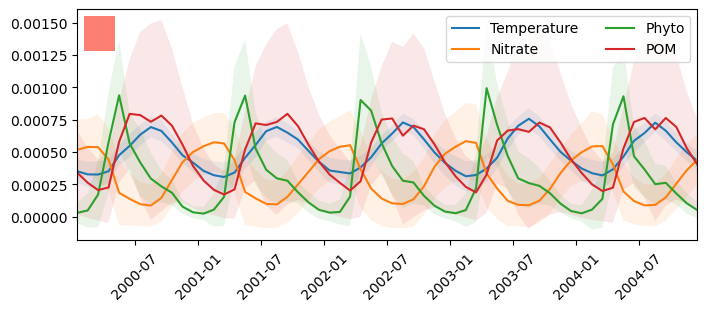

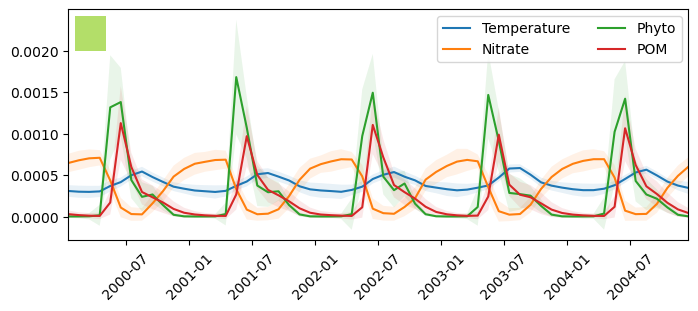

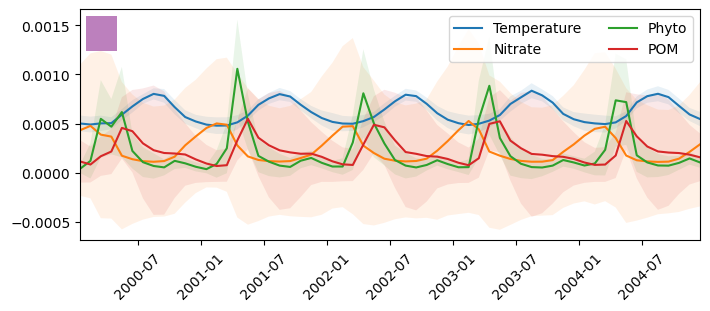

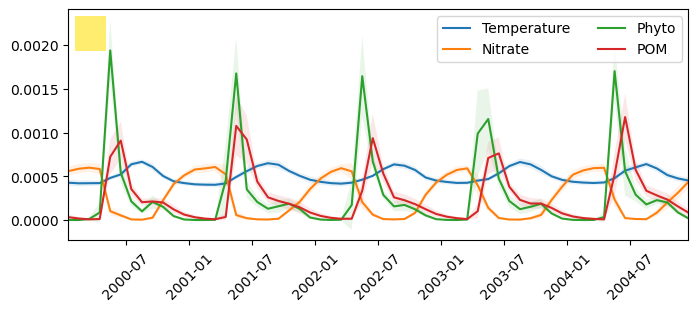

In [9]:
train.plot_map()
train.plot_ts(plot_vars={'votemper':'Temperature','N3_n':'Nitrate','Phytoplankton':'Phyto', 'POM':'POM'})

## Form prediction using new data

Make a new instance, load our model, and dataset and grid infomation.

In [10]:
predict = ModelViz.ModelViz()

In [11]:
predict.load_model('model.ks')

In [12]:
predict.load_mfdata('../../AMM7-MONTHLY-SURFACE/amm7_200[5-9]*.nc')
predict.load_grid('../../AMM7-MONTHLY-SURFACE/domain_cfg.nc')

In [13]:
phys = ModelViz.ModelViz()
phys.load_mfdata('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/amm7_TS_200[5-9]*.nc')
phys.ds = phys.ds.rename_dims({'y_grid_T':'y','x_grid_T':'x'}).rename({'nav_lat_grid_T':'nav_lat','nav_lon_grid_T':'nav_lon'})
predict.ds = xr.merge([predict.ds,phys.ds[['votemper','vosaline']]])

Summarise and preprocess data

In [14]:
predict.summarise_features(sum_vars)
predict.cluster_vars = ['votemper','vosaline','N1_p', 'N3_n', 'N4_n', 'N5_s', 'O2_o', 'B1_c','O3_c', 'O3_TA', 'Phytoplankton', 'Zooplankton', 'DOM', 'POM']
predict.preprocess()

Create the tsds, produce the prediction and create cluster dataset

In [ ]:
predict.make_tsds()
predict.predict()
predict.n_clusters = 5
predict.get_cluster_info(save=True, file_path='predicted_clusters.nc')

Plot output

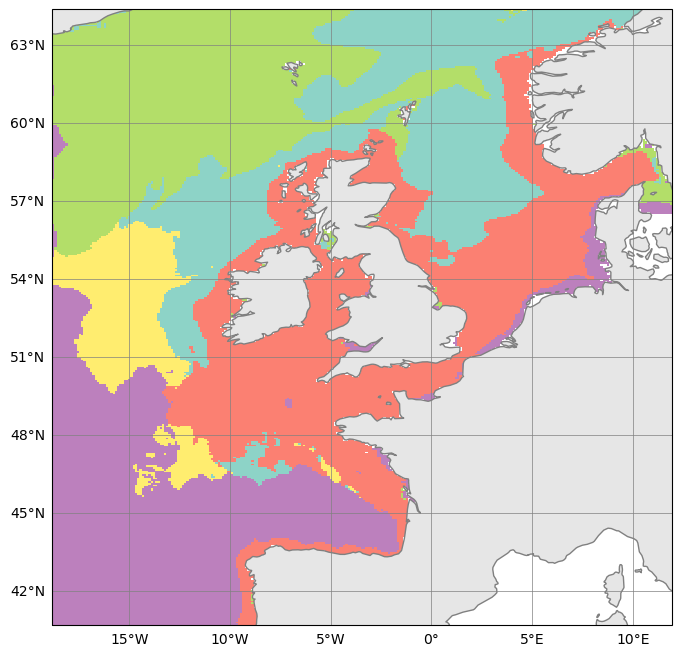

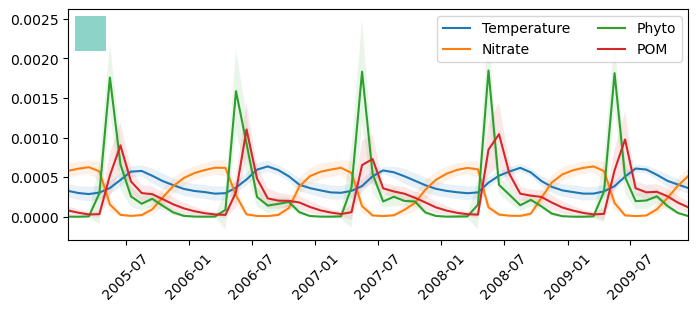

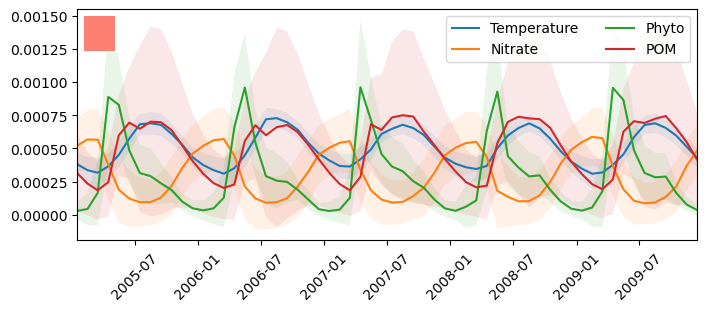

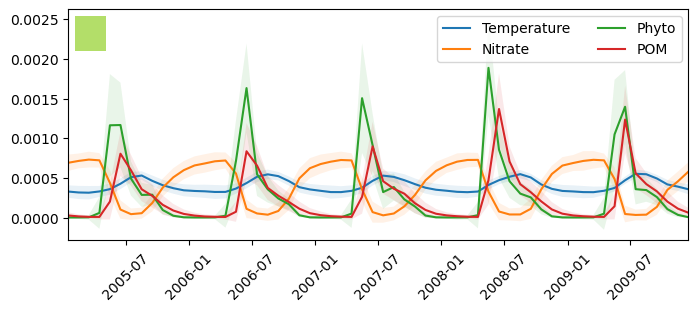

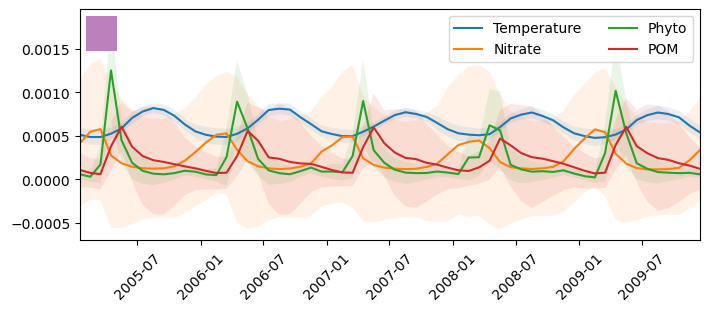

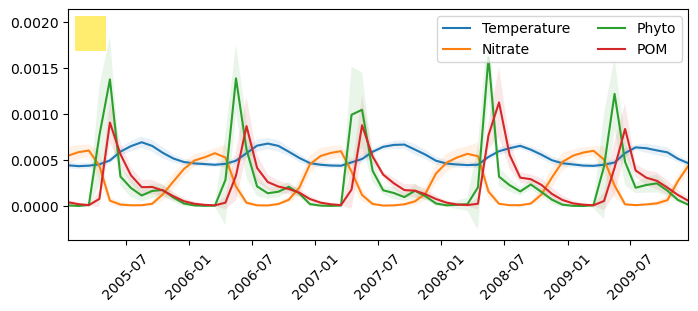

In [23]:
predict.plot_map()
predict.plot_ts(plot_vars={'votemper':'Temperature','N3_n':'Nitrate','Phytoplankton':'Phyto', 'POM':'POM'})

Plot time series with rescaled values

In [18]:
predict.cluster_ds = predict.cluster_ds.groupby('time.month').mean().rename({'month':'time'})

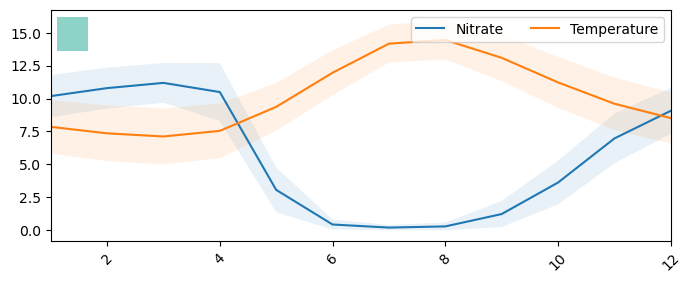

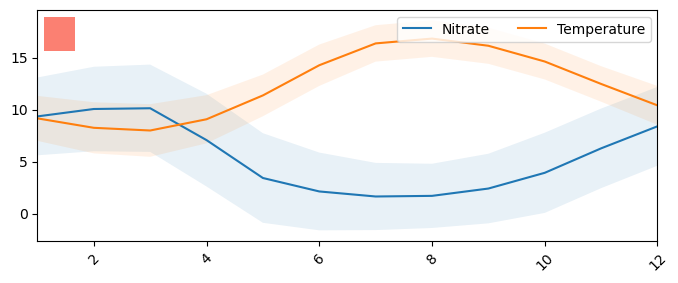

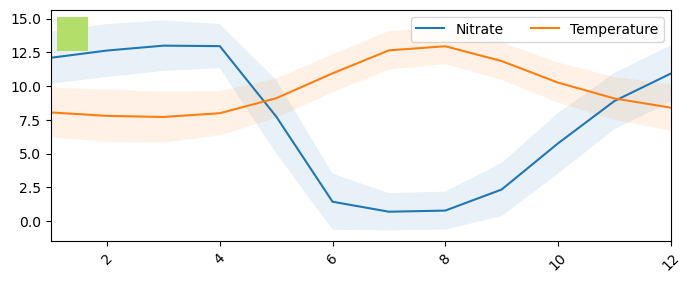

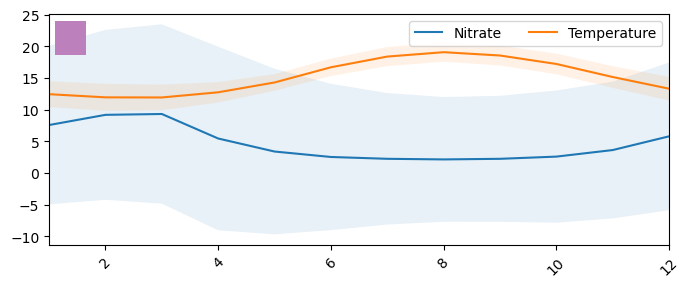

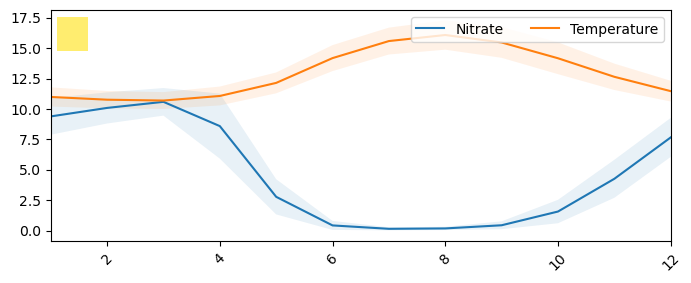

In [20]:
plot_vars = {'N3_n':'Nitrate','votemper':'Temperature'}
predict.plot_ts(plot_vars=plot_vars,rescale=True)